# Importing 

In [8]:
pip install pyforest

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pyforest
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn import preprocessing
from sklearn import metrics

# Ignore warnings 

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Reading file

In [3]:
df=pd.read_csv("E:\crome downloades\Excelr/Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# Data Exploration

In [4]:
df.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [5]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
print (df.shape)
df.info()

(600, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [7]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [4]:
df['Taxable.Income']=df['Taxable.Income'].apply(lambda x:0 if x<30000 else 1)

In [5]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,1,50047,10,YES
1,YES,Divorced,1,134075,18,YES
2,NO,Married,1,160205,30,YES
3,YES,Single,1,193264,15,YES
4,NO,Married,1,27533,28,NO


In [6]:
df['Marital.Status']=df['Marital.Status'].replace(['Single','Divorced','Married'],[0,2,1])
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,0,1,50047,10,YES
1,YES,2,1,134075,18,YES
2,NO,1,1,160205,30,YES
3,YES,0,1,193264,15,YES
4,NO,1,1,27533,28,NO


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [8]:
df['Undergrad']=encoder.fit_transform(df['Undergrad'])
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,0,1,50047,10,YES
1,1,2,1,134075,18,YES
2,0,1,1,160205,30,YES
3,1,0,1,193264,15,YES
4,0,1,1,27533,28,NO


In [9]:
df['Urban']=df['Urban'].replace(['YES','NO'],[1,0])
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,0,1,50047,10,1
1,1,2,1,134075,18,1
2,0,1,1,160205,30,1
3,1,0,1,193264,15,1
4,0,1,1,27533,28,0


In [10]:
df['Taxable.Income'].value_counts()

1    476
0    124
Name: Taxable.Income, dtype: int64

In [11]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [12]:
df=df.reindex(columns=['Taxable.Income','Undergrad', 'Marital.Status','City.Population','Work.Experience', 'Urban'])

In [13]:
df.head()

,Taxable.Income,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,1,0,0,50047,10,1
1,1,1,2,134075,18,1
2,1,0,1,160205,30,1
3,1,1,0,193264,15,1
4,1,0,1,27533,28,0


In [14]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]

In [15]:
X.head(3)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,0,50047,10,1
1,1,2,134075,18,1
2,0,1,160205,30,1


In [16]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Taxable.Income, dtype: int64

In [17]:
Y=pd.DataFrame(Y)
Y

,Taxable.Income
0,1
1,1
2,1
3,1
4,1
...,...
595,1
596,1
597,1
598,1


In [18]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.20)

In [19]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((480, 5), (480, 1), (120, 5), (120, 1))

In [20]:
from sklearn.model_selection import GridSearchCV

In [61]:
model=DecisionTreeClassifier()
parameters={"criterion":['gini',"entropy"],"max_features":[4,6,8],"max_depth":[4,6,8,10],"min_samples_split":[2,4,6,8]}

In [62]:
grid=GridSearchCV(model,parameters,cv=10)

In [63]:
grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10], 'max_features': [4, 6, 8],
                         'min_samples_split': [2, 4, 6, 8]})

In [64]:
grid.best_score_

0.7833333333333334

In [65]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 4,
 'min_samples_split': 8}

In [66]:
final_model=DecisionTreeClassifier(criterion='entropy',min_samples_split=4,max_depth= 4,
 max_features=4,random_state=12)
final_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=4,
                       min_samples_split=4, random_state=12)

In [67]:
y_test_pred=final_model.predict(x_test)
y_test

,Taxable.Income
460,1
473,1
404,1
75,1
167,1
...,...
558,1
262,1
31,1
429,1


In [68]:
score=cross_val_score(final_model,x_train,y_train,cv=10)
score.mean()

0.7770833333333333

In [69]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.77      0.95      0.85        93

    accuracy                           0.73       120
   macro avg       0.38      0.47      0.42       120
weighted avg       0.59      0.73      0.66       120



In [70]:
df.columns

Index(['Taxable.Income', 'Undergrad', 'Marital.Status', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

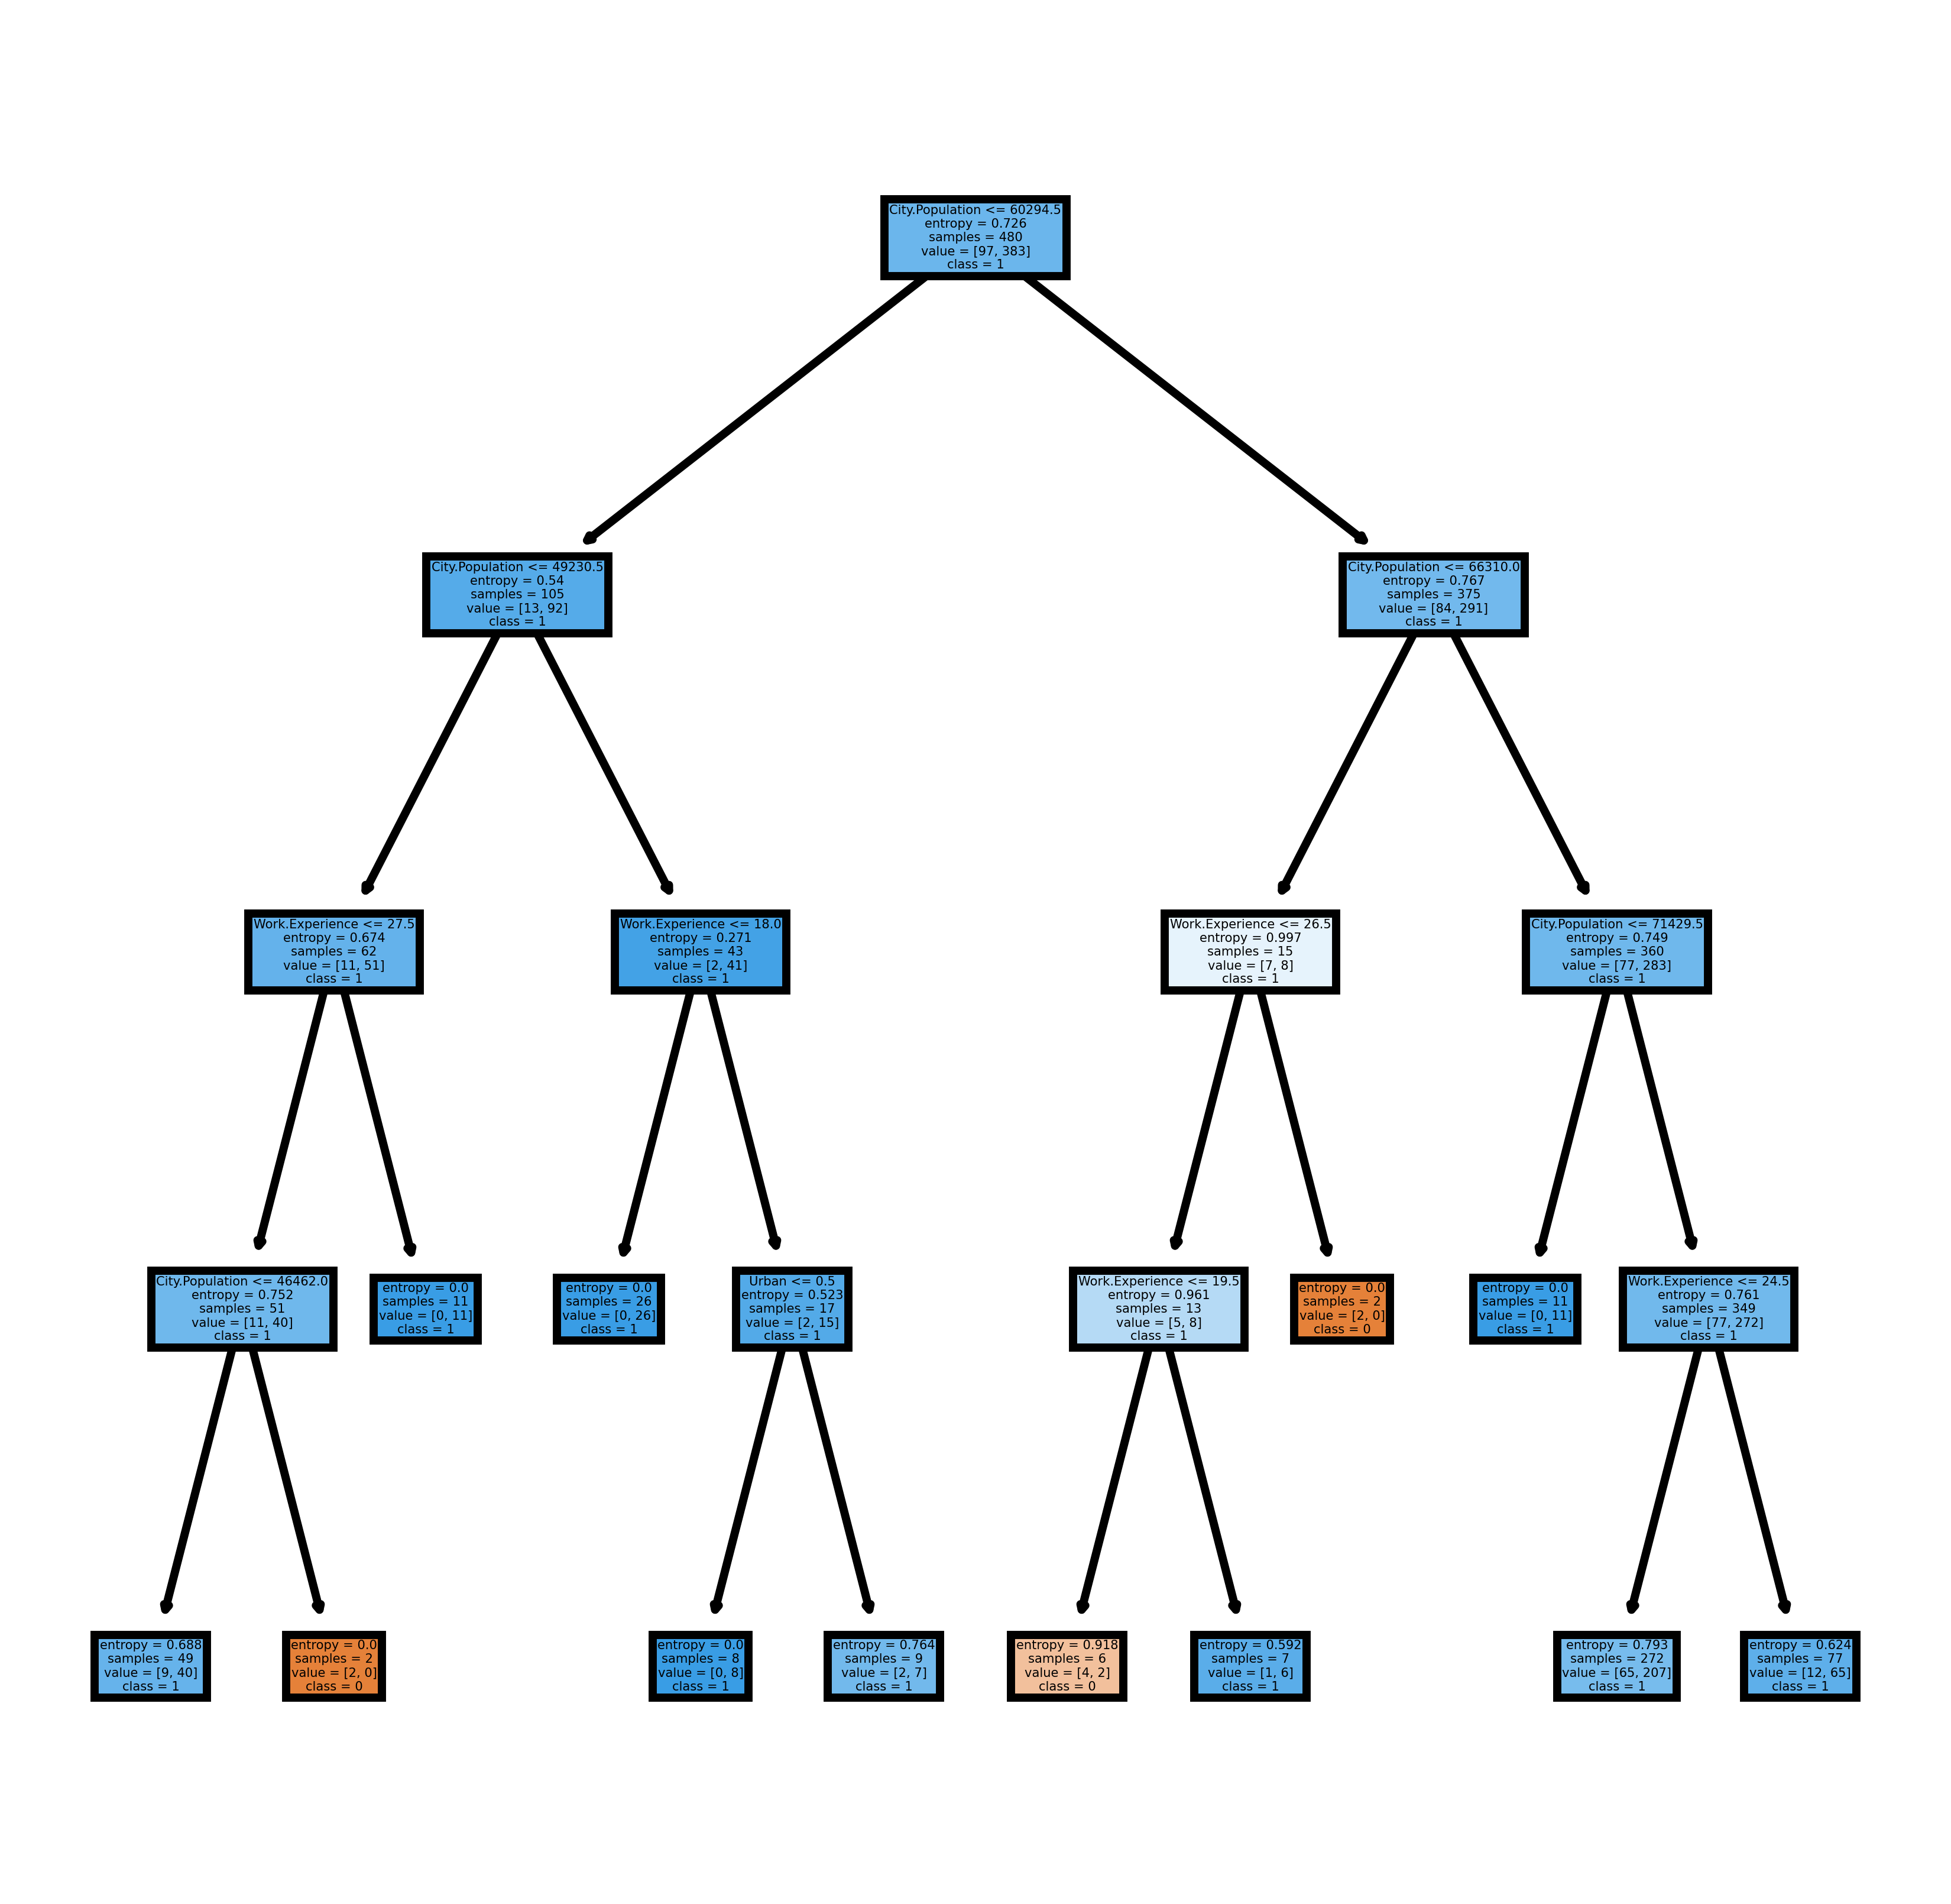

In [71]:
fn=['Undergrad', 'Marital.Status', 'City.Population',
       'Work.Experience', 'Urban']
cn=['0','1']
fig,axes=plt.subplots(figsize=(4,4),dpi=1000)
tree.plot_tree(final_model,feature_names=fn,class_names=cn,filled=True)
plt.show()